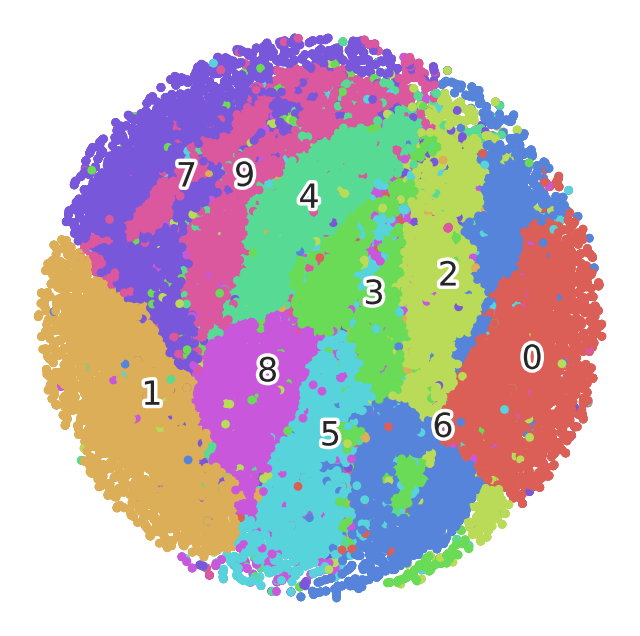

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x78f05e0385e0>)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.patheffects as PathEffects

# Set Seaborn style
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE to reduce dimensions and visualize
def scatter(x, colors):
    # Choose a color palette with seaborn
    palette = np.array(sns.color_palette("hls", 10))

    # Create a scatter plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # Add labels for each digit
    txts = []
    for i in range(10):
        # Position of each label
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

# Run t-SNE with different perplexity values and visualize
# digits_proj = TSNE(init="pca", random_state=20150101).fit_transform(X_scaled)
# scatter(digits_proj, y)

digits_proj = TSNE(init="pca", random_state=20150101, perplexity=2).fit_transform(X_scaled)
scatter(digits_proj, y)

# digits_proj = TSNE(init="pca", random_state=20150101, perplexity=100).fit_transform(X_scaled)
# scatter(digits_proj, y)

# digits_proj = TSNE(init="pca", random_state=20150101, n_iter=250).fit_transform(X_scaled)
# scatter(digits_proj, y)

# digits_proj = TSNE(init="pca", random_state=20150101, n_iter=5000).fit_transform(X_scaled)
# scatter(digits_proj, y)

# digits_proj = TSNE(init="pca", random_state=20150101, method='exact').fit_transform(X_scaled)
# scatter(digits_proj, y)


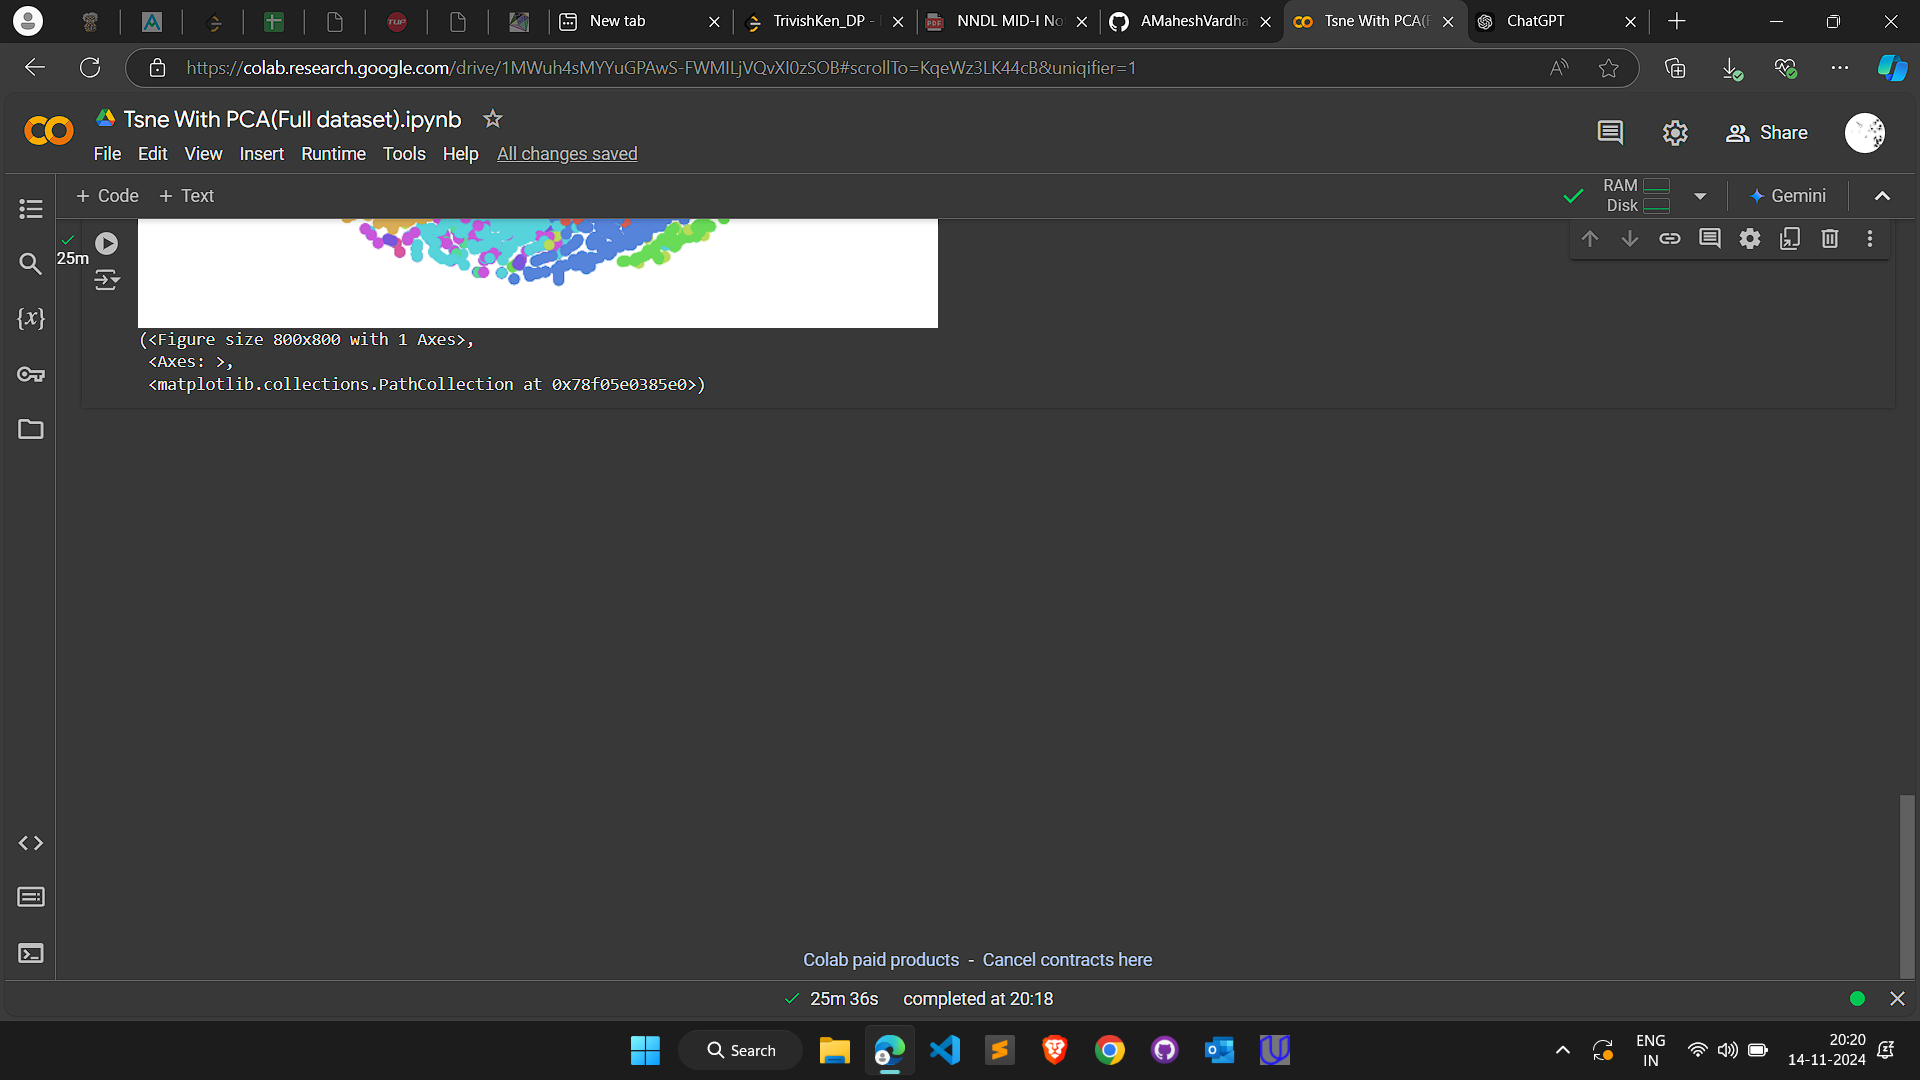